In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from plot_scripts import plot_dataset_compare_3
import os
# os.chdir("C:\\Users\moham\Desktop\plotting\experiment\plots")
print(os.getcwd())


C:\Users\moham\Desktop\plotting\experiment\plots


### Mnist dataset analysis

In [ ]:
base_path = "../out/real_world/mnist_dataset"
dataset_titles = ["mnist-0","mnist-0.1","mnist-0.3","mnist-0.5","mnist-0.7"]

path_normals = [f'{base_path}/mnist-0',f'{base_path}/mnist-0.1',f'{base_path}/mnist-0.3',f'{base_path}/mnist-0.5',f'{base_path}/mnist-0.7']
path_prox = [f'{base_path}/mnist-prox-0',f'{base_path}/mnist-prox-0.1',f'{base_path}/mnist-prox-0.3',f'{base_path}/mnist-prox-0.5',f'{base_path}/mnist-prox-0.7']

path_enhanced = [f'{base_path}/mnist-enhanced-0',f'{base_path}/mnist-enhanced-0.1',f'{base_path}/mnist-enhanced-0.3',f'{base_path}/mnist-enhanced-0.5',f'{base_path}/mnist-enhanced-0.7']


plot_dataset_compare_3(path_normals,path_enhanced,path_prox,dataset_titles,"mnist")

### femnist

In [ ]:
base_path = "../../out/real_world/femnist_dataset"
dataset_titles = ["femnist-0","femnist-0.1","femnist-0.3","femnist-0.5","femnist-0.7"]

path_normals = [f'{base_path}/femnist-0',f'{base_path}/femnist-0.1',f'{base_path}/femnist-0.3',f'{base_path}/femnist-0.5',f'{base_path}/femnist-0.7']
path_prox = [f'{base_path}/femnist-prox-0',f'{base_path}/femnist-prox-0.1',f'{base_path}/femnist-prox-0.3',f'{base_path}/femnist-prox-0.5',f'{base_path}/femnist-prox-0.7']

path_enhanced = [f'{base_path}/femnist-enhanced-0',f'{base_path}/femnist-enhanced-0.1',f'{base_path}/femnist-enhanced-0.3',f'{base_path}/femnist-enhanced-0.5',f'{base_path}/femnist-enhanced-0.7']


plot_dataset_compare_3(path_normals,path_enhanced,path_prox,dataset_titles,"femnist")

### Speech dataset analysis


In [ ]:
base_path = "../../out/real_world/speech_dataset"
dataset_titles = ["speech-0","speech-0.1","speech-0.3","speech-0.5","speech-0.7"]

path_normals = [f'{base_path}/speech-0',f'{base_path}/speech-0.1',f'{base_path}/speech-0.3',f'{base_path}/speech-0.5',f'{base_path}/speech-0.7']
path_prox = [f'{base_path}/speech-prox-0',f'{base_path}/speech-prox-0.1',f'{base_path}/speech-prox-0.3',f'{base_path}/speech-prox-0.5',f'{base_path}/speech-prox-0.7']

path_enhanced = [f'{base_path}/speech-enhanced-0',f'{base_path}/speech-enhanced-0.1',f'{base_path}/speech-enhanced-0.3',f'{base_path}/speech-enhanced-0.5',f'{base_path}/speech-enhanced-0.7']


plot_dataset_compare_3(path_normals,path_enhanced,path_prox,dataset_titles,"speech")

### Sheakspeare dataset

In [ ]:
base_path = "../../out/real_world/shakespeare_dataset"
dataset_titles = ["shakespeare-0","shakespeare-0.1","shakespeare-0.3","shakespeare-0.5","shakespeare-0.7"]

path_normals = [f'{base_path}/shakespeare-0',f'{base_path}/shakespeare-0.1',f'{base_path}/shakespeare-0.3',f'{base_path}/shakespeare-0.5',f'{base_path}/shakespeare-0.7']
path_prox = [f'{base_path}/shakespeare-prox-0',f'{base_path}/shakespeare-prox-0.1',f'{base_path}/shakespeare-prox-0.3',f'{base_path}/shakespeare-prox-0.5',f'{base_path}/shakespeare-prox-0.7']

path_enhanced = [f'{base_path}/shakespeare-enhanced-0',f'{base_path}/shakespeare-enhanced-0.1',f'{base_path}/shakespeare-enhanced-0.3',f'{base_path}/shakespeare-enhanced-0.5',f'{base_path}/shakespeare-enhanced-0.7']


plot_dataset_compare_3(path_normals,path_enhanced,path_prox,dataset_titles,"shakespeare")

# extras

### memory utilization experiment

In [ ]:
from plot_scripts import *
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

## memory utilization script

client_path = "../../out/mnist-flower-200-50/clients_33087451-4255-413e-a458-6f4c2aa0e658.csv"

client_table = pd.read_csv(client_path)

start_time = client_table["invocation_time"].min()
# sec to count dict
utilization_sec_dict ={}
print(start_time)
client_table["invocation_time"] = client_table["invocation_time"].apply(lambda x: np.ceil(x - start_time))
# print(client_table.to_string())
# dict contains client id and latest end time to check if it needs cool down
client_running_dict = {}
for idx,client in client_table.iterrows():
    inv_time = client['invocation_time']
    elapsed = np.floor(client['seconds'])
    # cool_down for a function
    delta = 5    
    add_client = True
    if client['client_id'] in client_running_dict:
        client_latest_cooldown = client_running_dict[client['client_id']]
        if client_latest_cooldown >= inv_time:
            add_client = False
            new_cool_down = max(inv_time+delta+elapsed, client_latest_cooldown)
            client_running_dict[client['client_id']] = new_cool_down
            prev_cool_down = client_latest_cooldown
            while prev_cool_down< new_cool_down:
                prev_cool_down+=1
                if prev_cool_down in  utilization_sec_dict:
                    utilization_sec_dict[prev_cool_down] = utilization_sec_dict[prev_cool_down]+1
                else:
                    utilization_sec_dict[prev_cool_down] = 1
            
        else:
            client_running_dict[client['client_id']] = inv_time+delta+elapsed
    else:
        client_running_dict[client['client_id']] = inv_time+delta+elapsed
            
            
    start_inv_time = inv_time
    while start_inv_time< inv_time+elapsed+delta:
        if start_inv_time in utilization_sec_dict:
            if add_client:
                utilization_sec_dict[start_inv_time] = utilization_sec_dict[start_inv_time]+1
        else:
            utilization_sec_dict[start_inv_time] = 1
        
        start_inv_time+=1
    
utilization_sec_dict = dict(sorted(utilization_sec_dict.items()))
x,y=list(utilization_sec_dict.keys()),list(utilization_sec_dict.values())
print(max(x), client_table["invocation_time"].min(),client_table["invocation_time"].max())
y_min = np.dot(y,600)
y_avg = np.dot(y,700)
y_max = np.dot(y,800)


fig, sub_plt = plt.subplots(1, 1,figsize=(12,12),squeeze=True)

print("stats: ", np.median(y_avg),np.mean(y_avg), np.std(y_avg))

# sub_plt.set_title(title)
sub_plt.xaxis.set_major_locator(MaxNLocator(integer=True))

# bar charts
#flower vs fedless median memory consumption
# [TODO]


### cost experiment [old]

In [ ]:
### old cost calculation [the script contains the modified version]
import json
from cost import closestNumber,calculate_costs_gcf
import pandas as pd
import numpy as np
# from cost import *
# client_path = "../../out/real_world/mnist_dataset/mnist-0/clients_3603a5bc-4a13-4124-a28a-a63773cbcb2e.csv"
client_path = "../../out/real_world/femnist_dataset/femnist-0/clients_85f73eea-5aed-44d8-b36a-5ece8ce8a170.csv"
client_path = "../../out/real_world/femnist_dataset/femnist-enhanced-0/clients_ddd56a6a-890b-46e7-ba82-c4b132636327.csv"


client_table = pd.read_csv(client_path)
timings_max= np.array([])
timings_min = np.array([])
cost_min = 0
cost_max = 0


for idx,client in client_table.iterrows():
    client_func = json.loads(client['function'])
    url = client_func['params']['url']
    id = url.split("-")[2]
    sim_delay = client_func['invocation_delay']
    exec_time = client["seconds"]
    timings_min = np.append(timings_min,exec_time)
    break
cost_list = calculate_costs_gcf(timings_min)
print(len(cost_list))
cost_min = np.sum(cost_list)


print(len(timings_min),cost_min)
    

In [ ]:
def plot_array(x_data, y_data,x_label,y_label, plt,title,plot_type, line_style="solid",strategy_name = None,color="blue"):
    # line type is a string refering to line 
        
    # data.plot(kind='line',x=x_axis_col,y=y_axis_col,ax=plt.gca())
    fig,sub_plt = plt
    sub_plt.set_xlabel(x_label,fontsize = axis_font)
    sub_plt.set_ylabel(y_label,fontsize = axis_font)
    sub_plt.tick_params(axis='x', labelsize=axis_font)
    sub_plt.tick_params(axis='y', labelsize=axis_font)
    # sub_plt.set_title(title)
    sub_plt.xaxis.set_major_locator(MaxNLocator(integer=True))
    # sub_plt.set_xticks()
    # sub_plt.set_yticks(np.arange(0,100,10))
    
    l = None
    if plot_type == "line":
      l,=  sub_plt.plot(x_data,y_data,linestyle=line_style,label=strategy_name,linewidth=3,color=color)
    elif plot_type == "violin":
      l,=  sub_plt.violinplot(x_data,y_data,label=strategy_name)
    elif plot_type == "bar":
      l,=  sub_plt.bar(x_data,y_data,label=strategy_name)

### Stragglers effect experiment

../../out/real_world/speech_dataset/speech-0/timing_6c3b93d5-ed45-4859-980e-13b6d2296717.csv


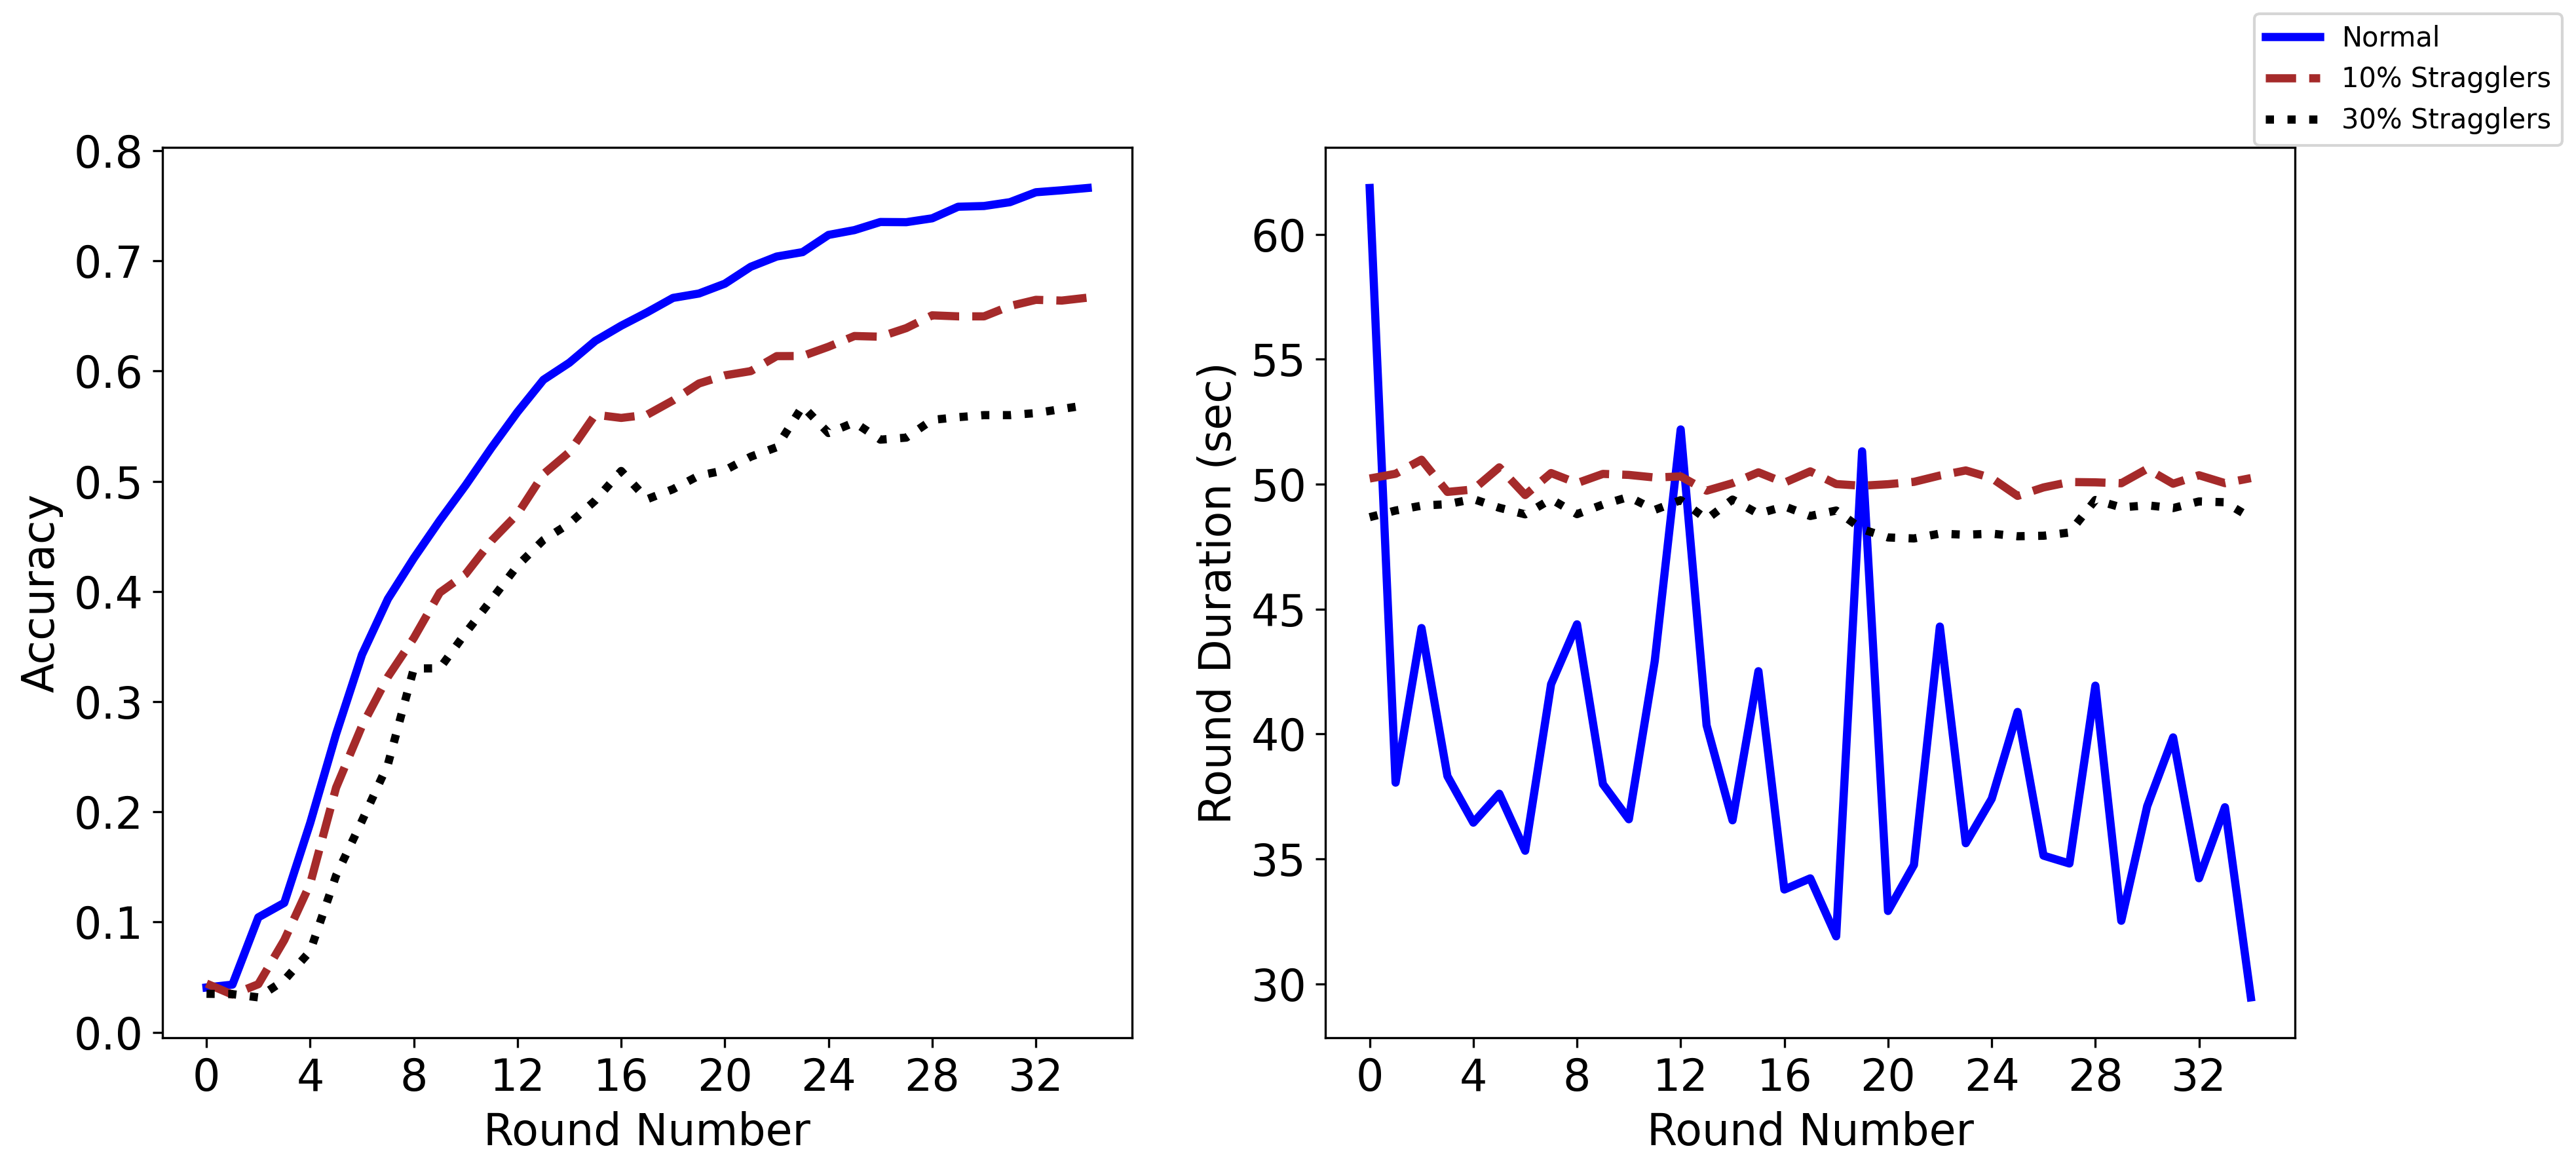

In [10]:
from plot_scripts import get_dir_session_files
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator

DPI = 300
mpl.rcParams['figure.dpi'] = DPI
axis_font = 16
def plot_figure(file_path, x_axis_col, y_axis_col,x_label,y_label, plt,title,plot_type, line_style="solid",strategy_name = None,color="blue"):
    data = pd.read_csv(file_path)
    x_data = data[x_axis_col].to_numpy()
    y_data = data[y_axis_col].to_numpy()
    x_data = x_data[:35]
    y_data = y_data[:35]
    if(y_axis_col=="succs"):
        total_clients = y_data[0]+data["failed"][0]
        straggler_rounds = np.count_nonzero(y_data<total_clients)
        y_data = y_data/total_clients
        print(f'{y_label} mean: {np.mean(y_data)}, straggler rounds: {straggler_rounds}')
    fig,sub_plt = plt
    sub_plt.set_xlabel(x_label,fontsize = axis_font)
    sub_plt.set_ylabel(y_label,fontsize = axis_font)
    sub_plt.tick_params(axis='x', labelsize=axis_font)
    sub_plt.tick_params(axis='y', labelsize=axis_font)
    # sub_plt.set_title(title)
    sub_plt.xaxis.set_major_locator(MaxNLocator(integer=True))
    # sub_plt.set_xticks()
    # sub_plt.set_yticks(np.arange(0,100,10))
    l,=  sub_plt.plot(x_data,y_data,linestyle=line_style,label=strategy_name,linewidth=3,color=color)
   
    


base_path = "../../out/real_world/speech_dataset"
path_normals = [f'{base_path}/speech-0',f'{base_path}/speech-0.1',f'{base_path}/speech-0.3']
zero,perc_1,perc_3 = get_dir_session_files(path_normals[0]),get_dir_session_files(path_normals[1]),get_dir_session_files(path_normals[2])
zero_timing = zero[1]
perc_1_timing = perc_1[1]
perc_3_timing = perc_3[1]
print(zero_timing)
plot,axis = plt.subplots(1, 2,figsize=(14,6),squeeze=True)
x_labels = [("round_id", "Round Number"),("round_id", "Round Number"),("round_id", "Round Number"),("round_id", "Round Number")]
y_labels = [("succs", "EUR"),("global_test_accuracy","Accuracy"),("global_test_loss","Loss"),("round_seconds","Round Duration (sec)")]


plot_figure(zero_timing,x_labels[1][0],y_labels[1][0],x_labels[1][1],y_labels[1][1],(plot,axis[0]),title="Effect of Stragglers",plot_type="line",line_style="solid",strategy_name = "Normal",color='blue')
plot_figure(perc_1_timing,x_labels[1][0],y_labels[1][0],x_labels[1][1],y_labels[1][1],(plot,axis[0]),title="Effect of Stragglers",plot_type="line",line_style="dashed",strategy_name = "10% Stragglers",color='Brown')
plot_figure(perc_3_timing,x_labels[1][0],y_labels[1][0],x_labels[1][1],y_labels[1][1],(plot,axis[0]),title="Effect of Stragglers",plot_type="line",line_style="dotted",strategy_name = "30% Stragglers",color='Black')

# timing 
max_timeout = 40

def adapt_st(file_path,skip=False):
    data = pd.read_csv(file_path)
    x_axis_col = "round_id"
    y_axis_col = "round_seconds"
    # take results to round 35 only
    x_data = data[x_axis_col].to_numpy()[:35]
    y_data = data[y_axis_col].to_numpy()[:35]
    timing_1_estimate = np.array([])
    for idx,d in data.iterrows():
        agg_seconds = d[2]
        client_seconds = d[4]
        total_sec = d[3]
        estimated_time = 0
        if not skip:
            estimated_time = max(client_seconds,45)+agg_seconds
        else:
            estimated_time =  client_seconds+agg_seconds

        timing_1_estimate = np.append(timing_1_estimate,estimated_time)
        # print(agg_seconds,client_seconds,total_sec,timing_1_estimate)
        # break
        if idx ==34:
            break
    return x_data,timing_1_estimate
  # break


normal_x_data,normal_y_data = adapt_st(zero_timing,skip=True)
plot_array(normal_x_data,normal_y_data,x_labels[1][1],y_labels[3][1],(plot,axis[1]),title="Effect of Stragglers",plot_type="line",line_style="solid",color='blue')

perc1_x_data,perc1_y_data = adapt_st(perc_1_timing)
plot_array(perc1_x_data,perc1_y_data,x_labels[1][1],y_labels[3][1],(plot,axis[1]),title="Effect of Stragglers",plot_type="line",line_style="dashed",color='brown')

perc3_x_data,perc3_y_data = adapt_st(perc_3_timing)
plot_array(perc3_x_data,perc3_y_data,x_labels[1][1],y_labels[3][1],(plot,axis[1]),title="Effect of Stragglers",plot_type="line",line_style="dotted",color='black')

# plot_figure(perc_3_timing,x_labels[1][0],y_labels[1][0],x_labels[1][1],y_labels[1][1],(plot,axis[0]),title="Effect of Stragglers",plot_type="line",line_style="dotted",strategy_name = "30% Stragglers",color='Black')

leg = plot.legend(loc='upper right')

plot.savefig(f'./stragglers_problem.pdf', bbox_inches='tight',dpi = DPI)
